In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [ ]:
file_name = "iris.data.csv"

In [269]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [ ]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:</h1> Implement a single perceptron to perform a binary classification of setosa and non-setosa classes

In [271]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


In [ ]:
# Function to plot decision boundary
def plot_decision_boundary(pred_func, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X['petal_length'].min() - .5, X['petal_length'].max() + .5
    y_min, y_max = X['petal_width'].min() - .5, X['petal_width'].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.title('Decision Boudary')
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.contourf(xx, yy, Z, cmap=plt.cm.copper)

    # plot scatter plot for all samples, different class with different color
    x_s_l = []
    x_s_d = [] 
    x_ns_l = []
    x_ns_d = []
    for i, label in enumerate(Y):
      if label == 1:
        x_s_l.append(X['petal_length'].tolist()[i])
        x_s_d.append(X['petal_width'].tolist()[i])
      else: 
        x_ns_l.append(X['petal_length'].tolist()[i])
        x_ns_d.append(X['petal_width'].tolist()[i])
    plt.scatter(x_s_l,x_s_d,c='red',label='setosa')      
    plt.scatter(x_ns_l,x_ns_d, c='blue',label='non-setosa')
    
    plt.legend()

<h2>Define hyper-parameters</h2>

In [ ]:
lr = 0.01
epoch = 100

<h2>Define Placeholder and Variables</h2>

In [ ]:
tf.reset_default_graph()

# define placeholder
X = tf.placeholder(tf.float32,shape=[None,2],name='X')
Y = tf.placeholder(tf.float32,shape=[None,1],name='Y')

# define variables
#define the weights and initialized with random normal distribution
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

<h2>Define update rule and accuracy</h2>

In [ ]:
Y_out = tf.sigmoid(tf.add(tf.matmul(X,W),b))
Y_pred = tf.round(Y_out)
correct_pred = tf.equal(Y_pred,Y)

accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#the error between target and logit
error = Y-Y_pred
#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X),error)
db = tf.reduce_sum(error,0)
W_ = W + lr*dW
b_ = b + lr*db

#group two operations together
step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

test accuracy:  1.0


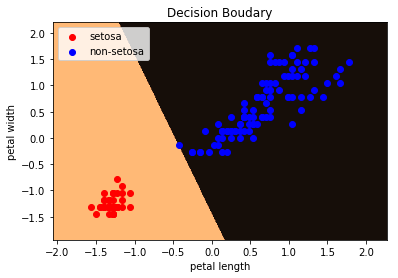

In [296]:
%matplotlib inline
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    ac_list = []
    #training for number of iterations
    for i in range(epoch):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X:x_train_1,Y:y_train_1})
        ac_list.append(sess.run(accuracy,feed_dict = {X:x_test_1,Y:y_test_1}))  
    print('test accuracy: ',sess.run(accuracy,feed_dict = {X:x_test_1,Y:y_test_1}))
    plot_decision_boundary(lambda x_1: sess.run(Y_pred, feed_dict={X:x_1}), x_1, y_1)

<h2>Plot</h2>

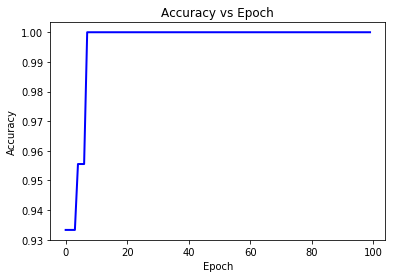

In [297]:
# plot cost vs epoch
plot_x = np.arange(0,epoch,1)
plot_y = ac_list
plt.title('Accuracy vs Epoch')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(plot_x, plot_y, color='blue', linewidth=2)

test accuracy:  1.0<br> In terms of the decision boudary plot, setosa has smaller petal length and width while other species have larger petal length and width. And the difference is very big. We can easily seperate setosa from other 2 species by observing petal length and width.

<h1>Part b:</h1>Implement another single perceptron to classify: virginica versus non-virginica using only petal width andpetal length features. Use the same learning rate and number of epochs as in part a. 

In [312]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


In [ ]:
# Function to plot decision boundary
def plot_decision_boundary2(pred_func, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X['petal_length'].min() - .5, X['petal_length'].max() + .5
    y_min, y_max = X['petal_width'].min() - .5, X['petal_width'].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.title('Decision Boudary')
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.contourf(xx, yy, Z, cmap=plt.cm.copper)

    # plot scatter plot for all samples, different class with different color
    x_s_l = []
    x_s_d = [] 
    x_ns_l = []
    x_ns_d = []
    for i, label in enumerate(Y):
      if label == 1:
        x_s_l.append(X['petal_length'].tolist()[i])
        x_s_d.append(X['petal_width'].tolist()[i])
      else: 
        x_ns_l.append(X['petal_length'].tolist()[i])
        x_ns_d.append(X['petal_width'].tolist()[i])
    plt.scatter(x_s_l,x_s_d,c='red',label='virginica')      
    plt.scatter(x_ns_l,x_ns_d, c='blue',label='non-virginica')
    
    plt.legend()

<h2>Define hyper-parameter</h2>

In [ ]:
lr = 0.01
epoch = 100

<h2>Define Placeholder and Variables</h2>

In [ ]:
tf.reset_default_graph()
# define placeholder
X = tf.placeholder(tf.float32,shape=[None,2],name='X')
Y = tf.placeholder(tf.float32,shape=[None,1],name='Y')

# define variables
#define the weights and initialized with random normal distribution
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

<h2>Define update rule and accuracy</h2>

In [ ]:
Y_out = tf.sigmoid(tf.add(tf.matmul(X,W),b))
Y_pred = tf.round(Y_out)
correct_pred = tf.equal(Y_pred,Y)

accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#the error between target and logit
error = Y-Y_pred
#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X),error)
db = tf.reduce_sum(error,0)
W_ = W + lr*dW
b_ = b + lr*db

#group two operations together
step = tf.group(W.assign(W_), b.assign(b_))

<h2>Execute training</h2>

test accuracy:  0.95555556


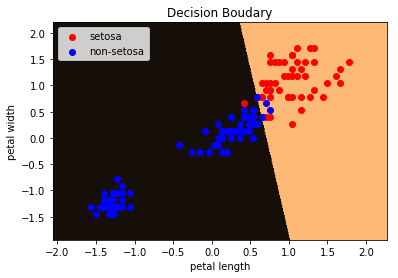

In [317]:
%matplotlib inline
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    ac_list = []
    #training for number of iterations
    for i in range(epoch):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X:x_train_2,Y:y_train_2})
        ac_list.append(sess.run(accuracy,feed_dict = {X:x_test_2,Y:y_test_2}))  
    print('test accuracy: ',sess.run(accuracy,feed_dict = {X:x_test_2,Y:y_test_2}))
    plot_decision_boundary(lambda x_2: sess.run(Y_pred, feed_dict={X:x_2}), x_2, y_2)

<h2>Plot</h2>

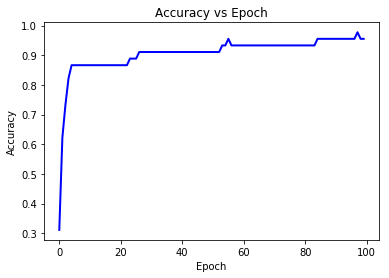

In [318]:
# plot cost vs epoch
plot_x = np.arange(0,epoch,1)
plot_y = ac_list
plt.title('Accuracy vs Epoch')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(plot_x, plot_y, color='blue', linewidth=2)

test accuracy = 0.95555556<br>
Among 3 species, virginica's petal width and length is the largest on th average. But some virginicas may have similar petal with versicolor. So the accuracy of classify virginicas by petal width and length is smaller than setosa's. we need another features to better seperate virginicas and verisicolor.

<h1>Part c:</h1>

In [319]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [ ]:
lr = 0.01
epoch = 100
n_hidden_1 = 256
n_hidden_2 = 128

<h2>Define placehoder and variables</h2>

In [ ]:
tf.reset_default_graph()
#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[None,4],name='X')
Y = tf.placeholder(tf.float32,shape=[None,3],name='Y')

#define the weights and initialized with random normal distribution
weights = {
    'W1':tf.Variable(tf.random_normal([4,n_hidden_1]),tf.float32,name='W1'),
    'W2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2]),tf.float32,name='W2'),
    'Wout':tf.Variable(tf.random_normal([n_hidden_2,3]),tf.float32,name='Wout')      
} 

#define the bias with zero initialization
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1]),tf.float32,name='b1'),
    'b2': tf.Variable(tf.zeros([n_hidden_2]),tf.float32,name='b2'),
    'bout': tf.Variable(tf.zeros([3]),tf.float32,name='bout')    
}


<h2>Define the neural network</h2>

In [ ]:
#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.relu(tf.matmul(x,weights['W1']) + biases['b1'])
    layer_2_out = tf.nn.relu(tf.matmul(layer_1_out,weights['W2']) + biases['b2'])
    out = tf.add(tf.matmul(layer_2_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function and accuracy</h2>

In [ ]:
#predicted labels
logits = neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h2>Execute training</h2>

In [332]:
#Initialize the variables
init = tf.global_variables_initializer()
#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    ac_list = []
    #training for number of iterations
    for i in range(epoch):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train_op,feed_dict = {X:x_train_3,Y:y_train_3})
        ac_list.append(sess.run(accuracy,feed_dict = {X:x_test_3,Y:y_test_3}))  
    print('test accuracy: ',sess.run(accuracy,feed_dict = {X:x_test_3,Y:y_test_3}))

test accuracy:  1.0


<h2>Plot</h2>

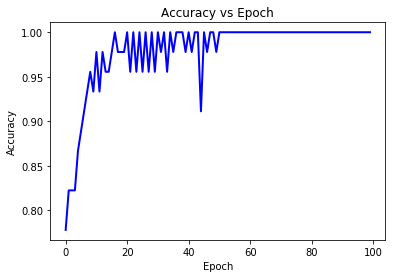

In [333]:
# plot cost vs epoch
plot_x = np.arange(0,epoch,1)
plot_y = ac_list
plt.title('Accuracy vs Epoch')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(plot_x, plot_y, color='blue', linewidth=2)